This file is for evaluating meteostat data 

In [85]:
from meteostat import Point, Hourly
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
# 4 random points in NYC
p0 = Point(40.76678085327149, -73.9214782714843) # 30 Av (N,W) Queens
p1 = Point(40.68962860107422, -73.9222717285156) # Gates Av (J,Z) Brooklyn
p2 = Point(40.63506317138672, -74.01171875) #8 Av (N) Brooklyn
p3 = Point(40.83648681640625, -73.8470382690429) # Zerega Av (6) Bronx
p4 = Point(40.7789, -73.9692) # Central park USW00094728 station

# 1.5 yrs worth of data
start =  pd.to_datetime('2023-01-01')
end = pd.to_datetime('2024-05-28')

df = pd.DataFrame()

for i, point in enumerate([p0, p1, p2, p3, p4]):
    data = Hourly(p1, start, end)
    new_df = data.fetch()
    new_df['location_index'] = i
    df = pd.concat([df, new_df])
    print(df.shape)

(12313, 12)
(24626, 12)
(36939, 12)
(49252, 12)
(61565, 12)


In [87]:
df.reset_index(inplace=True)

# Data Exploration and Evaluation

In [88]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
0,2023-01-01 00:00:00,11.0,10.5,97.0,1.0,NaN,220.0,6.0,NaN,1010.0,NaN,7.0,0
1,2023-01-01 01:00:00,11.7,10.6,93.0,0.8,NaN,180.0,7.6,NaN,1009.0,NaN,8.0,0
2,2023-01-01 02:00:00,11.7,11.1,96.0,1.0,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,0
3,2023-01-01 03:00:00,11.7,11.1,96.0,2.8,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,0
4,2023-01-01 04:00:00,12.2,11.1,93.0,0.8,NaN,260.0,13.0,NaN,1007.9,NaN,7.0,0


In [89]:
# Outputs # rows
print("Number of rows:", df.shape[0])
# Outputs # cols
print("Number of cols:", df.shape[1])

Number of rows: 61565
Number of cols: 13


In [90]:
df.dtypes

time              datetime64[ns]
temp                     float64
dwpt                     float64
rhum                     float64
prcp                     float64
snow                     float64
wdir                     float64
wspd                     float64
wpgt                     float64
pres                     float64
tsun                     float64
coco                     float64
location_index             int64
dtype: object

In [91]:
# Find duplicate rows
print("Number of duplicate rows:", df[df.duplicated()==True].shape[0])

Number of duplicate rows: 0


In [92]:
# Check for null values in each column
print(df.isnull().sum())

time                  0
temp                  0
dwpt                  0
rhum                  0
prcp                  0
snow              61565
wdir                  0
wspd                  0
wpgt              61565
pres                  0
tsun              61565
coco                  0
location_index        0
dtype: int64


In [93]:
# Numeric
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns

In [94]:
# Get cardinality of the numeric columns
numeric_columns_card = df[numeric_columns].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
time,12313
temp,106
dwpt,375
rhum,87
prcp,77
snow,0
wdir,100
wspd,40
wpgt,0
pres,481


In [95]:
# First describe the numeric features
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,min,25%,50%,75%,max,std
time,61565,2023-09-14 12:00:00.000000256,2023-01-01 00:00:00,2023-05-09 06:00:00,2023-09-14 12:00:00,2024-01-20 18:00:00,2024-05-28 00:00:00,NaN
temp,61565.0,13.290327,-15.0,6.7,12.2,20.6,35.6,8.767055
dwpt,61565.0,5.133136,-25.6,-2.1,5.2,12.2,24.4,9.389735
rhum,61565.0,60.914075,11.0,46.0,61.0,77.0,100.0,19.445193
prcp,61565.0,0.168692,0.0,0.0,0.0,0.0,27.7,0.888526
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wdir,61565.0,186.683911,0.0,80.0,210.0,290.0,360.0,114.982292
wspd,61565.0,14.459409,0.0,9.4,13.0,18.4,68.4,8.273702
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,61565.0,1015.497482,982.4,1010.2,1015.5,1021.0,1039.4,8.14775


In [96]:
# Add % missing
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
time,0.0
temp,0.0
dwpt,0.0
rhum,0.0
prcp,0.0
snow,100.0
wdir,0.0
wspd,0.0
wpgt,100.0
pres,0.0


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'dwpt'}>,
        <Axes: title={'center': 'rhum'}>],
       [<Axes: title={'center': 'prcp'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'wdir'}>,
        <Axes: title={'center': 'wspd'}>],
       [<Axes: title={'center': 'wpgt'}>,
        <Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'tsun'}>,
        <Axes: title={'center': 'coco'}>],
       [<Axes: title={'center': 'location_index'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

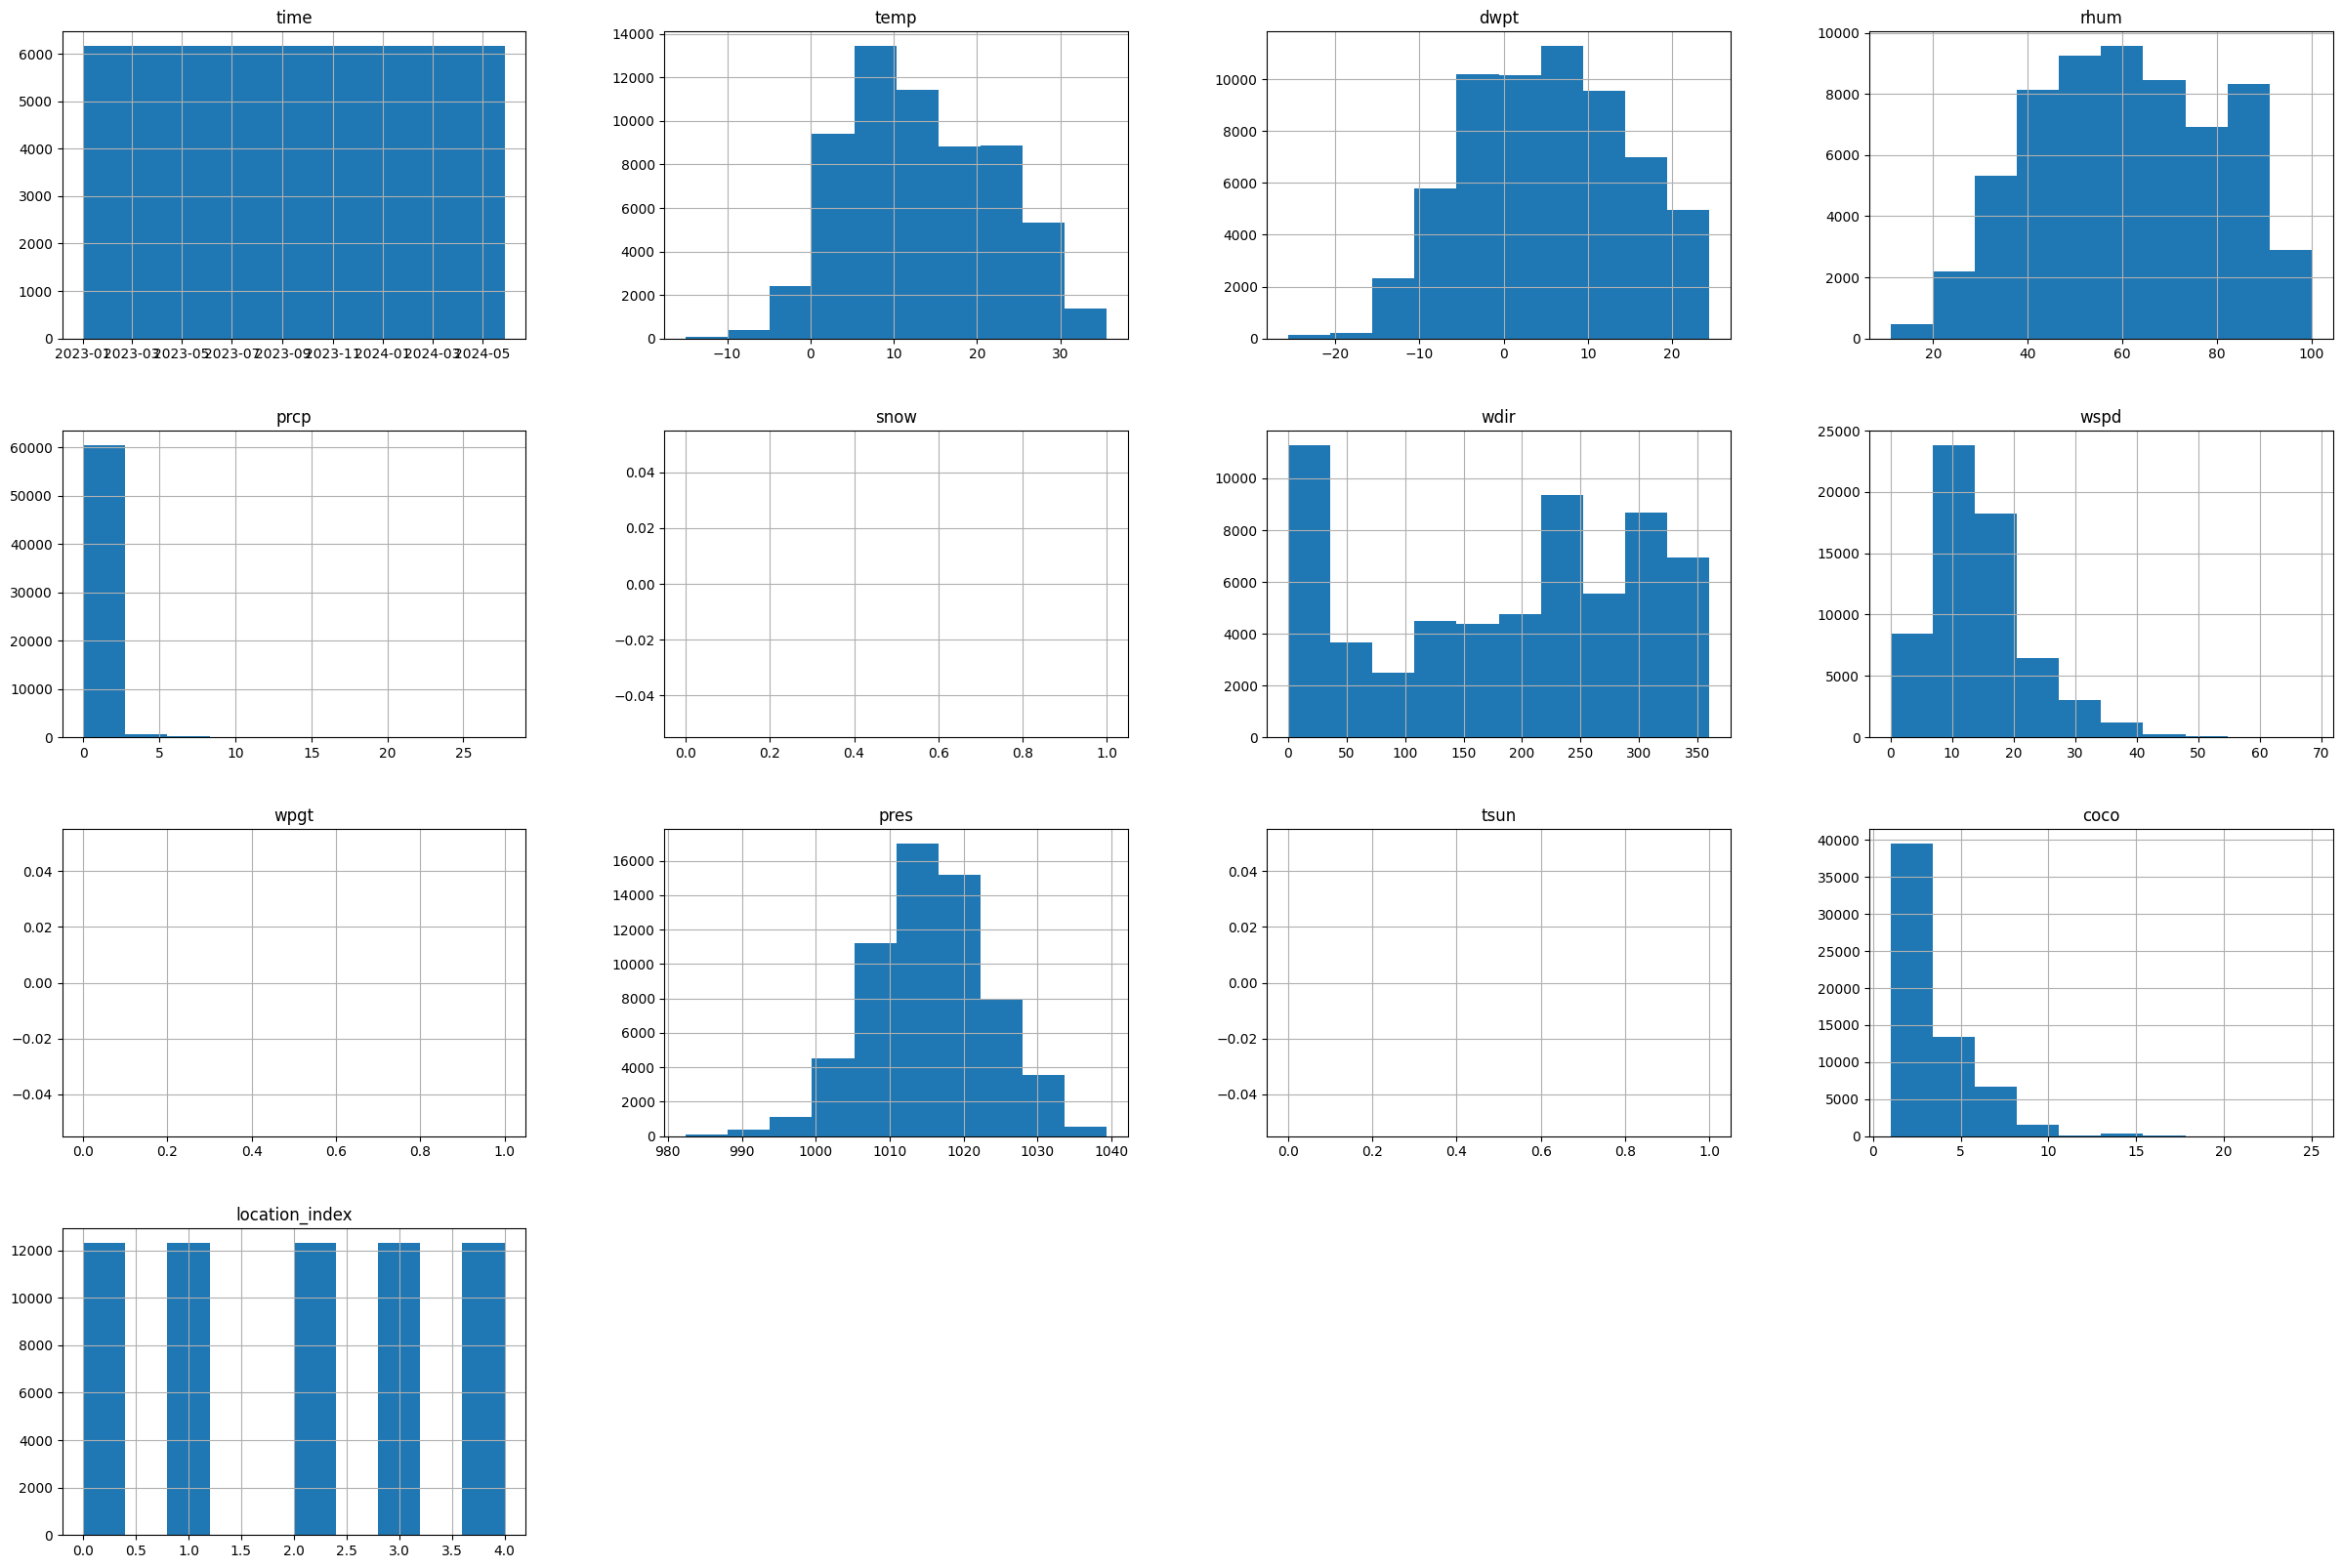

In [97]:
# Plot them all together instead
plt.figure()
df.hist(figsize=(30, 20))

In [98]:
# Concatenate numeric, missing and cardinality cols
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("Meteostat-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
time,61565,2023-09-14 12:00:00.000000256,2023-01-01 00:00:00,2023-05-09 06:00:00,2023-09-14 12:00:00,2024-01-20 18:00:00,2024-05-28 00:00:00,NaN,0.0,12313
temp,61565.0,13.290327,-15.0,6.7,12.2,20.6,35.6,8.767055,0.0,106
dwpt,61565.0,5.133136,-25.6,-2.1,5.2,12.2,24.4,9.389735,0.0,375
rhum,61565.0,60.914075,11.0,46.0,61.0,77.0,100.0,19.445193,0.0,87
prcp,61565.0,0.168692,0.0,0.0,0.0,0.0,27.7,0.888526,0.0,77
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0
wdir,61565.0,186.683911,0.0,80.0,210.0,290.0,360.0,114.982292,0.0,100
wspd,61565.0,14.459409,0.0,9.4,13.0,18.4,68.4,8.273702,0.0,40
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0
pres,61565.0,1015.497482,982.4,1010.2,1015.5,1021.0,1039.4,8.14775,0.0,481


# Logical Integrity Tests

1. Timestamps not before Jan 2023 or after 28th May 2024.
2. 5 timestamps for every hour between 1st Jan 2023 and 28th May 2024 (12313 hours).
3. No temperature in central park in 2023 below NYC Central park min (-16.1) or above NYC central park max (+33.9 C).
4. Wind direction not below 0 or above 360

In [99]:
# Test 1

df[df['time']<start]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [100]:
df[df['time']> end]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [115]:
# Test 2
print(df.shape[0] == 12313*5)

True


In [102]:
# Test 3
df[df['temp']< -16.1]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [116]:
df[ (df['location_index']  == 4) & (df['temp']> 33.9)]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
53879,2023-07-12 19:00:00,34.4,15.8,33.0,0.0,NaN,290.0,14.8,NaN,1012.0,NaN,3.0,4
53880,2023-07-12 20:00:00,34.4,15.8,33.0,0.0,NaN,260.0,14.8,NaN,1012.1,NaN,3.0,4
54237,2023-07-27 17:00:00,34.4,22.8,51.0,0.0,NaN,230.0,35.3,NaN,1012.5,NaN,3.0,4
54238,2023-07-27 18:00:00,34.4,22.8,51.0,0.0,NaN,240.0,33.5,NaN,1012.5,NaN,3.0,4
54239,2023-07-27 19:00:00,35.6,23.2,49.0,0.0,NaN,240.0,33.5,NaN,1011.6,NaN,3.0,4
54240,2023-07-27 20:00:00,34.4,21.8,48.0,0.0,NaN,240.0,33.5,NaN,1011.5,NaN,3.0,4
54261,2023-07-28 17:00:00,34.4,20.8,45.0,0.0,NaN,280.0,13.0,NaN,1014.7,NaN,2.0,4
54262,2023-07-28 18:00:00,34.4,20.8,45.0,0.0,NaN,280.0,13.0,NaN,1014.7,NaN,2.0,4
54263,2023-07-28 19:00:00,35.0,20.2,42.0,0.0,NaN,260.0,22.3,NaN,1014.1,NaN,3.0,4
54264,2023-07-28 20:00:00,35.0,19.4,40.0,0.0,NaN,260.0,16.6,NaN,1013.5,NaN,3.0,4


In [104]:
df[ (df['location_index']  == 4) & (df['temp']> 33.9)].shape

(25, 13)

In [105]:
# Test 4
df[df['wdir']<0]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [106]:
df[df['wdir']>360]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


# Comparison with NOAA Central park data

In [120]:
noaa_start = start =  pd.to_datetime('2023-01-01')
noaa_end = pd.to_datetime('2023-06-01')
df_compare = df[(df['location_index'] == 4) & (df['time'] <= noaa_end) & (df['time']>= noaa_start)]

In [121]:
df_compare.shape

(3625, 13)

In [122]:
df_compare.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
49252,2023-01-01 00:00:00,11.0,10.5,97.0,1.0,NaN,220.0,6.0,NaN,1010.0,NaN,7.0,4
49253,2023-01-01 01:00:00,11.7,10.6,93.0,0.8,NaN,180.0,7.6,NaN,1009.0,NaN,8.0,4
49254,2023-01-01 02:00:00,11.7,11.1,96.0,1.0,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4
49255,2023-01-01 03:00:00,11.7,11.1,96.0,2.8,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4
49256,2023-01-01 04:00:00,12.2,11.1,93.0,0.8,NaN,260.0,13.0,NaN,1007.9,NaN,7.0,4


In [198]:
df_noaa = pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014734_2023.psv", sep='|')
# La Guardia pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014732_2023.psv", sep='|')
# Central park pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00094728_2023.psv", sep='|')
# The Battery pd.read_csv("./hourly_data_2023/2023/GHCNh_USL000BATN6_2023.psv", sep='|')
# Port Auth pd.read_csv("./hourly_data_2023/2023/GHCNh_USI0000KJRB_2023.psv", sep='|')
# Newark pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014734_2023.psv", sep='|')

In [199]:
df_noaa['time'] = df_noaa.apply(lambda row: pd.to_datetime(f"{row['Year']}-{row['Month']}-{row['Day']} {row['Hour']}:{row['Minute']}"), axis=1)

In [200]:
df_noaa.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,...,sky_cover_baseht_3_Report_Type,sky_cover_baseht_3_Source_Code,sky_cover_baseht_3_Source_Station_ID,remarks,remarks_Measurement_Code,remarks_Quality_Code,remarks_Report_Type,remarks_Source_Code,remarks_Source_Station_ID,time
0,USW00014734,NEWARK LIBERTY INTL AP,2023,1,1,0,51,40.6828,-74.1692,1.8,...,NaN,NaN,NaN,MET15012/31/22 19:51:03 METAR KEWR 010051Z 220...,NaN,F,NaN,343,725020-14734,2023-01-01 00:51:00
1,USW00014734,NEWARK LIBERTY INTL AP,2023,1,1,1,51,40.6828,-74.1692,1.8,...,NaN,NaN,NaN,MET14012/31/22 20:51:03 METAR KEWR 010151Z 180...,NaN,F,NaN,343,725020-14734,2023-01-01 01:51:00
2,USW00014734,NEWARK LIBERTY INTL AP,2023,1,1,2,49,40.6828,-74.1692,1.8,...,FM16-SPECI,343.0,725020-14734,MET13512/31/22 21:49:03 SPECI KEWR 010249Z 230...,NaN,F,NaN,343,725020-14734,2023-01-01 02:49:00
3,USW00014734,NEWARK LIBERTY INTL AP,2023,1,1,2,51,40.6828,-74.1692,1.8,...,FM15-METAR,343.0,725020-14734,MET15912/31/22 21:51:03 METAR KEWR 010251Z 230...,NaN,F,NaN,343,725020-14734,2023-01-01 02:51:00
4,USW00014734,NEWARK LIBERTY INTL AP,2023,1,1,3,51,40.6828,-74.1692,1.8,...,FM15-METAR,343.0,725020-14734,MET12512/31/22 22:51:03 METAR KEWR 010351Z 260...,NaN,F,NaN,343,725020-14734,2023-01-01 03:51:00


In [201]:
df_noaa.columns.values

array(['Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Latitude', 'Longitude', 'Elevation', 'temperature',
       'temperature_Measurement_Code', 'temperature_Quality_Code',
       'temperature_Report_Type', 'temperature_Source_Code',
       'temperature_Source_Station_ID', 'dew_point_temperature',
       'dew_point_temperature_Measurement_Code',
       'dew_point_temperature_Quality_Code',
       'dew_point_temperature_Report_Type',
       'dew_point_temperature_Source_Code',
       'dew_point_temperature_Source_Station_ID',
       'station_level_pressure',
       'station_level_pressure_Measurement_Code',
       'station_level_pressure_Quality_Code',
       'station_level_pressure_Report_Type',
       'station_level_pressure_Source_Code',
       'station_level_pressure_Source_Station_ID', 'sea_level_pressure',
       'sea_level_pressure_Measurement_Code',
       'sea_level_pressure_Quality_Code',
       'sea_level_pressure_Report_Type', 'sea_level_pres

In [202]:
print(df_noaa.dtypes)

Station_ID                           object
Station_name                         object
Year                                  int64
Month                                 int64
Day                                   int64
                                  ...      
remarks_Quality_Code                 object
remarks_Report_Type                 float64
remarks_Source_Code                   int64
remarks_Source_Station_ID            object
time                         datetime64[ns]
Length: 191, dtype: object


In [203]:
df_noaa = df_noaa[['time', 'temperature', 'sea_level_pressure','station_level_pressure', 'wind_direction', 'wind_speed', 'precipitation','relative_humidity' ]]

In [204]:
df_noaa['wind_direction'].replace(999, 0, inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [205]:
df_joined = pd.merge_asof(df_compare, df_noaa, on='time', direction='nearest')

In [206]:
df_joined.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index,temperature,sea_level_pressure,station_level_pressure,wind_direction,wind_speed,precipitation,relative_humidity
0,2023-01-01 00:00:00,11.0,10.5,97.0,1.0,NaN,220.0,6.0,NaN,1010.0,NaN,7.0,4,11.1,1009.8,1008.7,220.0,1.5,0.8,97.0
1,2023-01-01 01:00:00,11.7,10.6,93.0,0.8,NaN,180.0,7.6,NaN,1009.0,NaN,8.0,4,11.1,1009.8,1008.7,220.0,1.5,0.8,97.0
2,2023-01-01 02:00:00,11.7,11.1,96.0,1.0,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4,11.7,1009.0,1008.1,180.0,2.1,1.0,93.0
3,2023-01-01 03:00:00,11.7,11.1,96.0,2.8,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4,11.7,1008.4,1007.4,230.0,3.6,2.8,96.0
4,2023-01-01 04:00:00,12.2,11.1,93.0,0.8,NaN,260.0,13.0,NaN,1007.9,NaN,7.0,4,12.2,1007.9,1007.1,260.0,3.6,0.8,93.0


In [207]:
df_joined['temp_delta'] = df_joined['temp'] - df_joined['temperature']
df_joined['rhum_delta'] = df_joined['rhum'] - df_joined['relative_humidity']
df_joined['prcp_delta'] = df_joined['prcp'] - df_joined['precipitation']
df_joined['wdir_delta'] = abs(df_joined['wdir'] - df_joined['wind_direction'])
df_joined['wspd_delta'] = df_joined['wspd'] - df_joined['wind_speed']

In [208]:
df_joined.loc[df_joined['wdir_delta']>180, 'wdir_delta'] = 360 - df_joined['wdir_delta']

In [209]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp_delta,3625.0,0.000221,0.865232,-6.1,-0.5,0.0,0.0,4.4
rhum_delta,3625.0,-0.185931,4.012972,-23.0,-1.0,0.0,1.0,32.0
prcp_delta,3012.0,0.027490,0.262327,-0.4,0.0,0.0,0.0,7.4
wdir_delta,3625.0,17.582069,33.398820,0.0,0.0,0.0,20.0,180.0
wspd_delta,3625.0,11.058317,6.508931,-4.1,6.8,10.4,14.8,38.7


array([[<Axes: title={'center': 'temp_delta'}>,
        <Axes: title={'center': 'rhum_delta'}>],
       [<Axes: title={'center': 'prcp_delta'}>,
        <Axes: title={'center': 'wdir_delta'}>],
       [<Axes: title={'center': 'wspd_delta'}>, <Axes: >]], dtype=object)

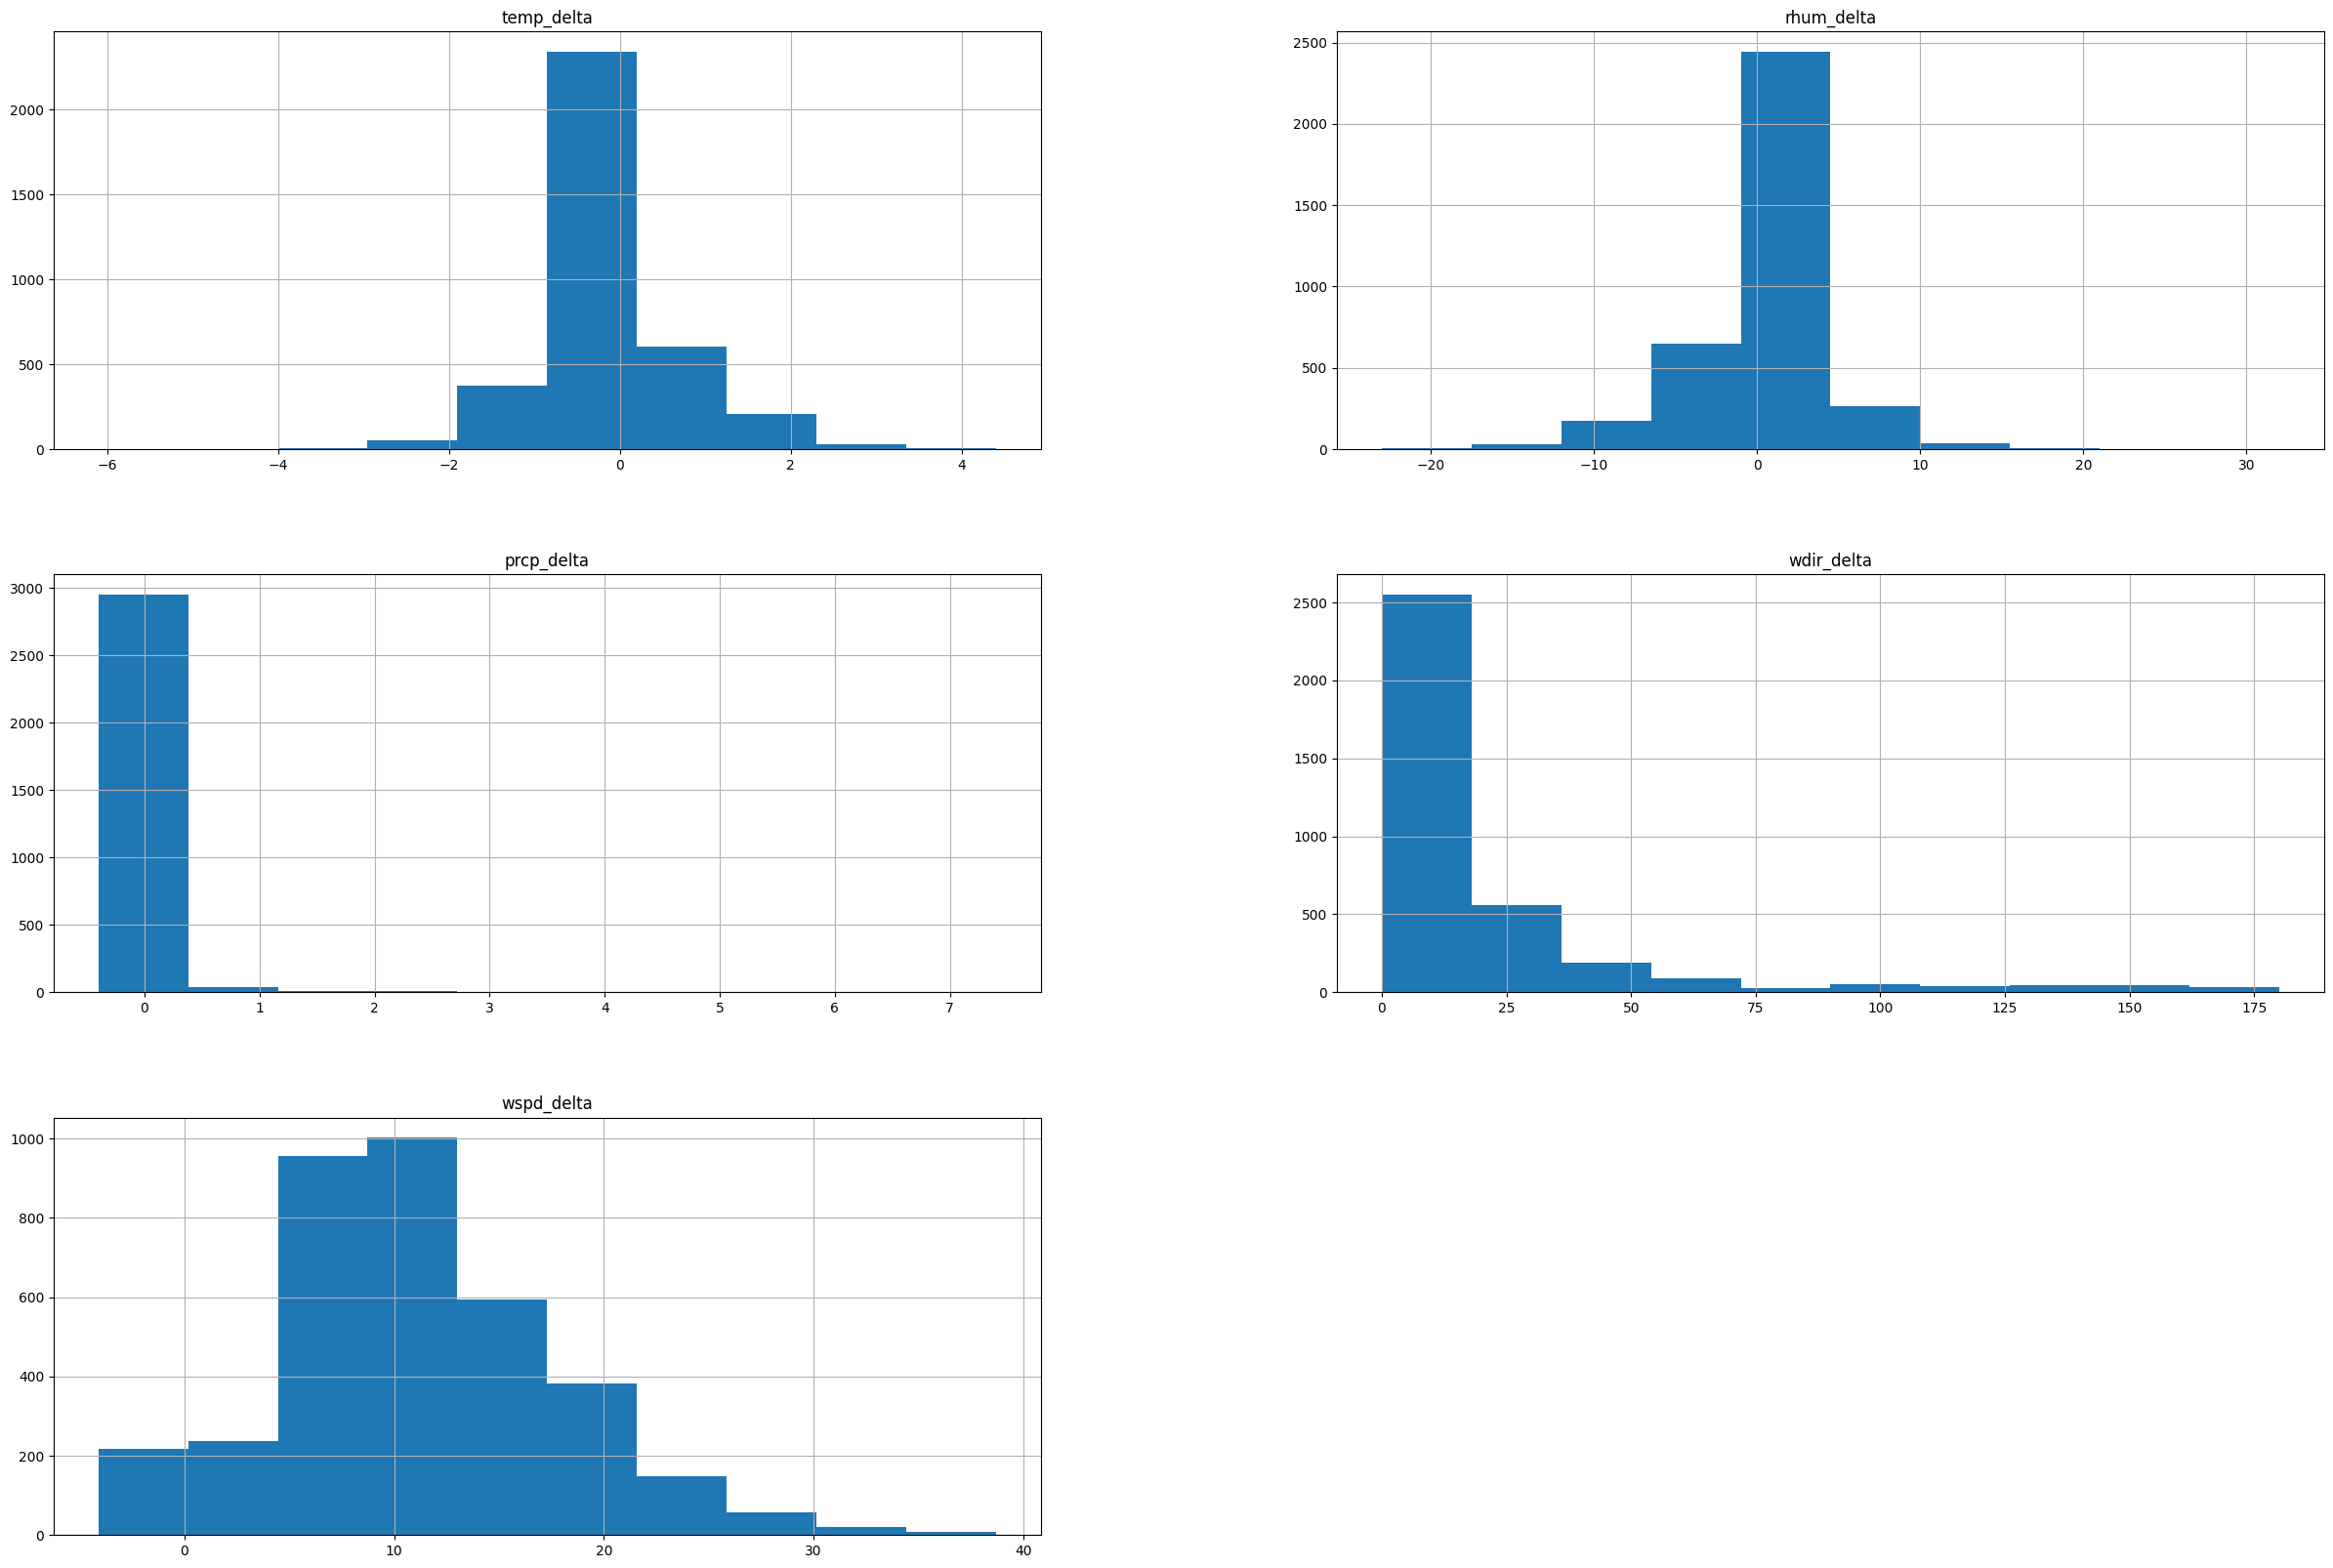

In [210]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].hist(figsize=(30, 20))